A stored procedure in MySQL is a precompiled set of SQL statements that can be executed as a single unit. It allows for reusability of code, automates repetitive tasks, and enhances performance by reducing the need to send multiple queries to the database. Stored procedures can also encapsulate complex logic and control transactions, making them useful for managing database operations efficiently. They promote better security by limiting direct access to underlying data, as users can execute the procedure without accessing the tables directly.

Here are some key points about stored procedures in MySQL:

When you create a stored procedure, the SQL code within it is compiled and optimized, which can improve performance when the procedure is executed repeatedly.

Stored procedures can accept parameters, allowing you to pass values into them when they are called. This makes stored procedures flexible and reusable.

Stored procedures encapsulate complex logic within the database, which can help improve security and maintainability by centralizing business logic.
Stored procedures can handle transactions, allowing you to commit or roll back changes depending on the success or failure of specific tasks.

Stored procedures can include transaction control statements, allowing you to perform multiple SQL operations as a single, atomic unit of work.



Since stored procedures are executed on the database server, only the results need to be transmitted over the network, reducing network traffic compared to executing multiple SQL statements individually.

You can grant or revoke permissions to execute stored procedures separately from other database objects, providing fine-grained access control.

When a stored procedure is executed, it is precompiled, which means MySQL optimizes it for performance. This can lead to faster execution, especially when the same procedure is run repeatedly.

Stored procedures can hide complex business logic from users, limiting access to the underlying tables and queries. Users can execute the procedure without needing direct access to the database tables.

In [ ]:
delimiter $$

Lets create a Stored procedure with IN and OUT parameter

We will create new database EmployeeDB

we will create a new table employees

In [ ]:
DELIMITER //

CREATE PROCEDURE GetEmployeeDetails(
IN empID INT,
OUT empName VARCHAR(100),
OUT empSalary DECIMAL(10, 2)
)
BEGIN
#Fetch employee name and salary from the employees table based on the provided empID
SELECT name, salary INTO empName, empSalary
FROM employees
WHERE id = empID;
END //

DELIMITER ;


Call the Stored Procedure to Test It:

In [ ]:
-- Declare variables to hold the output values
SET @name = '';
SET @salary = 0.00;

-- Call the stored procedure with an input value and output variables
CALL GetEmployeeDetails(1, @name, @salary);

-- Select the output variables to see the result
SELECT @name AS EmployeeName, @salary AS EmployeeSalary;


# Explanation

CREATE DATABASE EmployeeDB; USE EmployeeDB;: Creates a new database named EmployeeDB and switches to it.


CREATE TABLE employees (...);: Creates a table named employees with id, name, and salary columns


INSERT INTO employees (name, salary) VALUES (...);: Inserts sample data into the employees table.


DELIMITER // ... DELIMITER ;: Changes the statement delimiter to allow for the creation of the stored procedure and then changes it back

CALL GetEmployeeDetails(1, @name, @salary);: Calls the stored procedure with 1 as the employee ID, storing the name and salary in the @name and @salary variables.


SELECT @name AS EmployeeName, @salary AS EmployeeSalary;: Selects and displays the values stored in the output variables.

# Step-by-Step Guide to Drop the Stored Procedure

1.Use the correct database:

2.Drop the stored procedure:

# Note:



# Show procedures

use rohit_new_s_database;

In [ ]:
SHOW PROCEDURE STATUS WHERE Db = 'rohit_new_s_database';

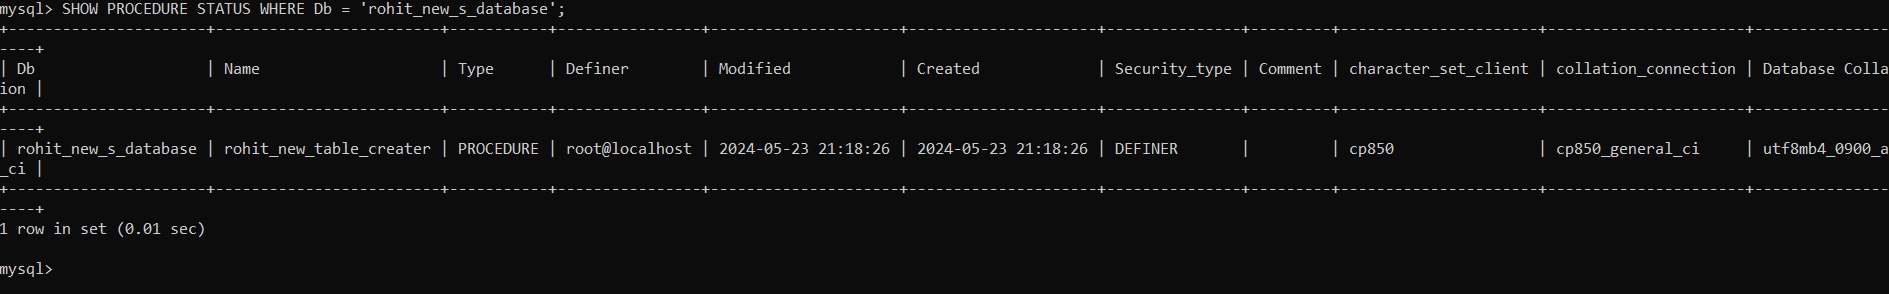

In [ ]:
SELECT ROUTINE_NAME, ROUTINE_TYPE 
FROM INFORMATION_SCHEMA.ROUTINES 
WHERE ROUTINE_SCHEMA = 'EmployeeDB' -- Replace 'EmployeeDB' with your database name
AND ROUTINE_NAME = 'GetEmployeeDetails'; -- Replace with the procedure name


In [ ]:
INFORMATION_SCHEMA.ROUTINES: This table contains metadata for both stored procedures and functions.
ROUTINE_SCHEMA: The database in which the procedure exists (replace 'EmployeeDB' with the actual database name).
ROUTINE_NAME: The name of the stored procedure you are checking for (replace 'GetEmployeeDetails' with the actual procedure name).
ROUTINE_TYPE: This can be either 'PROCEDURE' or 'FUNCTION'.
If the procedure exists, this query will return its name and type. If it doesn’t exist, the query will return no results.

In [ ]:
SELECT PARAMETER_NAME, PARAMETER_MODE, DATA_TYPE
FROM INFORMATION_SCHEMA.PARAMETERS
WHERE SPECIFIC_SCHEMA = 'EmployeeDB'   -- Replace 'EmployeeDB' with your database name
AND SPECIFIC_NAME = 'GetEmployeeDetails';  -- Replace with your stored procedure name


In [ ]:
Explanation:
INFORMATION_SCHEMA.PARAMETERS: Contains details about parameters in stored procedures and functions.
SPECIFIC_SCHEMA: The name of the database where the stored procedure resides (replace 'EmployeeDB' with your database name).
SPECIFIC_NAME: The name of the stored procedure (replace 'GetEmployeeDetails' with the actual procedure name).
PARAMETER_NAME: The name of the parameter (e.g., empID, empName).
PARAMETER_MODE: Indicates whether the parameter is IN, OUT, or INOUT.
DATA_TYPE: The data type of the parameter (e.g., INT, VARCHAR).

In [ ]:
Understanding the Results:
empID is an IN parameter of type INT. It is passed into the stored procedure.
empName is an OUT parameter of type VARCHAR. It is an output from the stored procedure.
empSalary is an OUT parameter of type DECIMAL. It is also an output from the procedure.